In [1]:
import datetime
from nowtrade.symbol_list import StockList
from nowtrade.data_connection import MongoDatabaseConnection
from nowtrade import dataset 
from nowtrade import technical_indicator
from nowtrade import criteria
from nowtrade import criteria_group
from nowtrade import trading_profile
from nowtrade import trading_amount
from nowtrade import trading_fee
from nowtrade import strategy
from nowtrade import ensemble
from nowtrade.action import Long
from nowtrade.action import Short
from nowtrade.action import LongExit
from nowtrade.action import ShortExit

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
sl=StockList(['GOOGL'])
symbol= sl.get('GOOGL')

In [4]:
train_start = datetime.datetime(2013, 01, 03)
train_end = datetime.datetime(2016,01, 01)
train_dataset = dataset.Dataset(sl, MongoDatabaseConnection(), train_start, train_end)
#train_dataset=dc.get_data(symbol,train_start,train_end)

In [5]:
train_dataset.load_data()

In [6]:
train_dataset.data_frame.columns

Index([u'GOOGL_Adj Close', u'GOOGL_Close', u'GOOGL_High', u'GOOGL_Low',
       u'GOOGL_Open', u'GOOGL_Volume'],
      dtype='object')

In [7]:
train_dataset.data_frame.head()

,GOOGL_Adj Close,GOOGL_Close,GOOGL_High,GOOGL_Low,GOOGL_Open,GOOGL_Volume
Date,,,,,,
2013-01-03,362.197209,723.670024,731.930005,720.720035,724.929993,4631700.0
2013-01-04,369.354344,737.969980,741.470017,727.679987,729.340008,5521400.0
2013-01-07,367.742742,734.749998,739.380007,730.580038,735.449981,3308000.0
2013-01-08,367.017034,733.300033,736.300021,724.430006,735.540039,3348800.0
2013-01-09,369.429448,738.120037,738.350032,728.600026,732.269997,4045300.0


In [8]:
rf = ensemble.Ensemble([symbol.open, symbol.high, symbol.low, symbol.close, symbol.volume], [symbol.close])

In [9]:
rf.build_ensemble(train_dataset, prediction_window=5, look_back_window=25, number_of_jobs=2)

In [10]:
rf.fit()

In [11]:
train_dataset.data_frame.head()

,GOOGL_Adj Close,GOOGL_Close,GOOGL_High,GOOGL_Low,GOOGL_Open,GOOGL_Volume
Date,,,,,,
2013-01-03,362.197209,723.670024,731.930005,720.720035,724.929993,4631700.0
2013-01-04,369.354344,737.969980,741.470017,727.679987,729.340008,5521400.0
2013-01-07,367.742742,734.749998,739.380007,730.580038,735.449981,3308000.0
2013-01-08,367.017034,733.300033,736.300021,724.430006,735.540039,3348800.0
2013-01-09,369.429448,738.120037,738.350032,728.600026,732.269997,4045300.0


In [12]:
rf.save_to_file('test.ens')

In [13]:
rf= ensemble.load_from_file('test.ens')

In [14]:
test_start = train_end
test_end = datetime.datetime(2017, 04, 15)
test_dataset = dataset.Dataset(sl, MongoDatabaseConnection(), test_start, test_end)

In [15]:
test_dataset.load_data()

In [16]:
random_forest = technical_indicator.Ensemble(rf)

In [17]:
random_forest

ENSEMBLE_4aca7f5d-cbd8-407a-9768-85af291ceaae

In [ ]:
test_dataset.add_technical_indicator(random_forest)

In [19]:
z=pd.DataFrame()

In [20]:
z=test_dataset.data_frame[25:]

In [21]:
zz=pd.DataFrame()

In [22]:
z.head()

,GOOGL_Adj Close,GOOGL_Close,GOOGL_High,GOOGL_Low,GOOGL_Open,GOOGL_Volume,ENSEMBLE_4aca7f5d-cbd8-407a-9768-85af291ceaae
Date,,,,,,,
2016-02-09,701.020020,701.020020,720.960022,688.500000,692.950012,4215000.0,700.338814
2016-02-10,706.849976,706.849976,723.219971,705.390015,711.789978,3015700.0,748.952565
2016-02-11,706.359985,706.359985,712.320007,691.190002,696.340027,3250200.0,717.935687
2016-02-12,706.890015,706.890015,716.000000,701.580017,712.210022,2326900.0,749.750345
2016-02-16,717.640015,717.640015,722.880005,710.179993,718.650024,2172200.0,772.731813


In [23]:
r_f='ENSEMBLE_'+random_forest.name

In [24]:
zz=z.loc[:,['GOOGL_Close',r_f]]

In [25]:
zz.head()

,GOOGL_Close,ENSEMBLE_4aca7f5d-cbd8-407a-9768-85af291ceaae
Date,,
2016-02-09,701.020020,700.338814
2016-02-10,706.849976,748.952565
2016-02-11,706.359985,717.935687
2016-02-12,706.890015,749.750345
2016-02-16,717.640015,772.731813


In [26]:
zz.columns=['G_Close','rf']

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [28]:
mms=MinMaxScaler()

In [29]:
zz.head()

,G_Close,rf
Date,,
2016-02-09,701.020020,700.338814
2016-02-10,706.849976,748.952565
2016-02-11,706.359985,717.935687
2016-02-12,706.890015,749.750345
2016-02-16,717.640015,772.731813


In [30]:
zy=pd.DataFrame(mms.fit_transform(zz))

In [31]:
zy.columns=zz.columns

In [32]:
zy=zy.set_index(zz.index)

In [33]:
zy.head()

,G_Close,rf
Date,,
2016-02-09,0.103959,0.129975
2016-02-10,0.134445,0.317365
2016-02-11,0.131883,0.197805
2016-02-12,0.134655,0.320440
2016-02-16,0.190870,0.409026


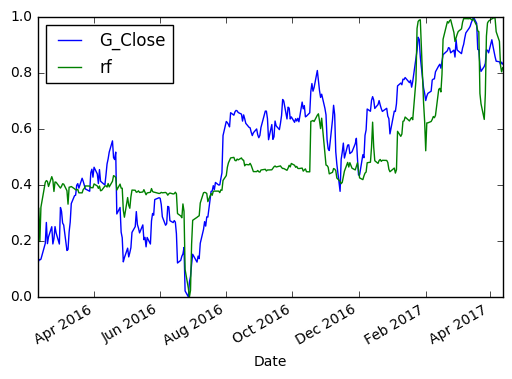

In [34]:
zy.plot()

In [35]:
threshold_above = technical_indicator.Addition(random_forest.value, 5)

In [36]:
threshold_below = technical_indicator.Subtraction(random_forest.value, 5)

In [37]:
test_dataset.add_technical_indicator(threshold_below)

In [38]:
test_dataset.add_technical_indicator(threshold_above)

In [39]:
#test_dataset.data_frame.tail()
#test_dataset.data_frame.head()

In [40]:
enter_crit_long = criteria.Below(symbol.close, threshold_below.value)

In [41]:
enter_crit_short = criteria.Above(symbol.close, threshold_above.value)

In [42]:
exit_crit_long = criteria.BarsSinceLong(symbol, 5)
exit_crit_short = criteria.BarsSinceShort(symbol, 5)

In [43]:
enter_crit_group1 = criteria_group.CriteriaGroup([enter_crit_long], Long(), symbol)
enter_crit_group2 = criteria_group.CriteriaGroup([enter_crit_short], Short(), symbol)
exit_crit_group1 = criteria_group.CriteriaGroup([exit_crit_long], LongExit(), symbol)
exit_crit_group2 = criteria_group.CriteriaGroup([exit_crit_short], ShortExit(), symbol)

In [44]:
tp = trading_profile.TradingProfile(100000, trading_amount.StaticAmount(10000), trading_fee.StaticFee(5))

In [45]:
strat = strategy.Strategy(test_dataset, [enter_crit_group1, enter_crit_group2, exit_crit_group1, exit_crit_group2], tp)

In [46]:
strat.simulate()

In [47]:
print strat.report.pretty_overview()

Trades:
GOOGL
Trade(datetime=2016-02-11 00:00:00, action=LONG, symbol=GOOGL, price=696.340027, shares=14.0, money=9748.760378, fee=5, slippage=0.0)
Trade(datetime=2016-02-22 00:00:00, action=LONG_EXIT, symbol=GOOGL, price=729.51001, shares=14.0, money=10213.14014, fee=5, slippage=0.0)
Trade(datetime=2016-02-23 00:00:00, action=LONG, symbol=GOOGL, price=726.099976, shares=14.0, money=10165.399664, fee=5, slippage=0.0)
Trade(datetime=2016-03-02 00:00:00, action=LONG_EXIT, symbol=GOOGL, price=742.869995, shares=14.0, money=10400.17993, fee=5, slippage=0.0)
Trade(datetime=2016-03-03 00:00:00, action=LONG, symbol=GOOGL, price=739.47998, shares=14.0, money=10352.71972, fee=5, slippage=0.0)
Trade(datetime=2016-03-11 00:00:00, action=LONG_EXIT, symbol=GOOGL, price=739.950012, shares=14.0, money=10359.300168, fee=5, slippage=0.0)
Trade(datetime=2016-03-14 00:00:00, action=LONG, symbol=GOOGL, price=744.969971, shares=13.0, money=9684.609623, fee=5, slippage=0.0)
Trade(datetime=2016-03-22 00:00:0